# Summarizing metrics from disturbed XS +y

Leanne Friedrich 4/26/23

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import matplotlib.pyplot as plt
import py.metrics.m_plot.m_plots as mp
import py.metrics.m_SDT as me
import regression as rg
import matplotlib.cm as cm
import py.file.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_xsy_SDT.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [149]:
ms = me.summarySDT(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'XS+ySDTSummaries.csv')
                             , diag=True)

Independents: 
	 meta        :  bn, calibFile, fluFile, printFolder
	                date
	 meta sup    :  sup_base, sup_days, sup_dye, sup_rheModifier, sup_shortname, sup_surfactant, sup_surfactantWt, sup_type, sup_var
	 meta ink    :  ink_base, ink_days, ink_dye, ink_rheModifier, ink_shortname, ink_surfactant, ink_surfactantWt, ink_type, ink_var
	 const       :  GaRatio, GdRatio, gname, GtaRatio, int_Ca, int_CaInv, int_Re, ReRatio, tau0aRatio, tau0dRatio, tGdRatio, viscRatio, vRatio
	                dEst, hDragP, pressureCh0, rGrava, rGravd, sigma, spacing, spacing_adj, vDragP, zdepth
	 const sup   :  sup_Bma, sup_Bmd, sup_Ca, sup_CaInv, sup_diluent, sup_diluentWt, sup_dnorma, sup_dnormd, sup_dnormInva, sup_dnormInvd, sup_Oh, sup_OhInv, sup_Re, sup_We, sup_WeInv
	                sup_density, sup_dPRa, sup_dPRd, sup_eta0a, sup_eta0d, sup_Gstora, sup_Gstord, sup_rate, sup_tau0a, sup_tau0d, sup_v, sup_val, sup_visc0
	 const ink   :  ink_Bma, ink_Bmd, ink_Ca, ink_CaInv, ink_diluent, ink_

,1,2,3
wp,X_w1p,X_w2p,X_w3p
wo,X_w1o,X_w2o,X_w3o
wrelax,delta_X_w1relax,delta_X_w2relax,delta_X_w3relax
write,delta_X_write1,delta_X_write2,
dp,X_d1p,X_d2p,
do,X_d1o,X_d2o,
drelax,delta_X_d1relax,delta_X_d2relax,
disturb,delta_X_disturb1,delta_X_disturb2,


In [112]:
ms.ss.ink_base.unique()

array(['PDMS_3', 'silicone oil'], dtype=object)

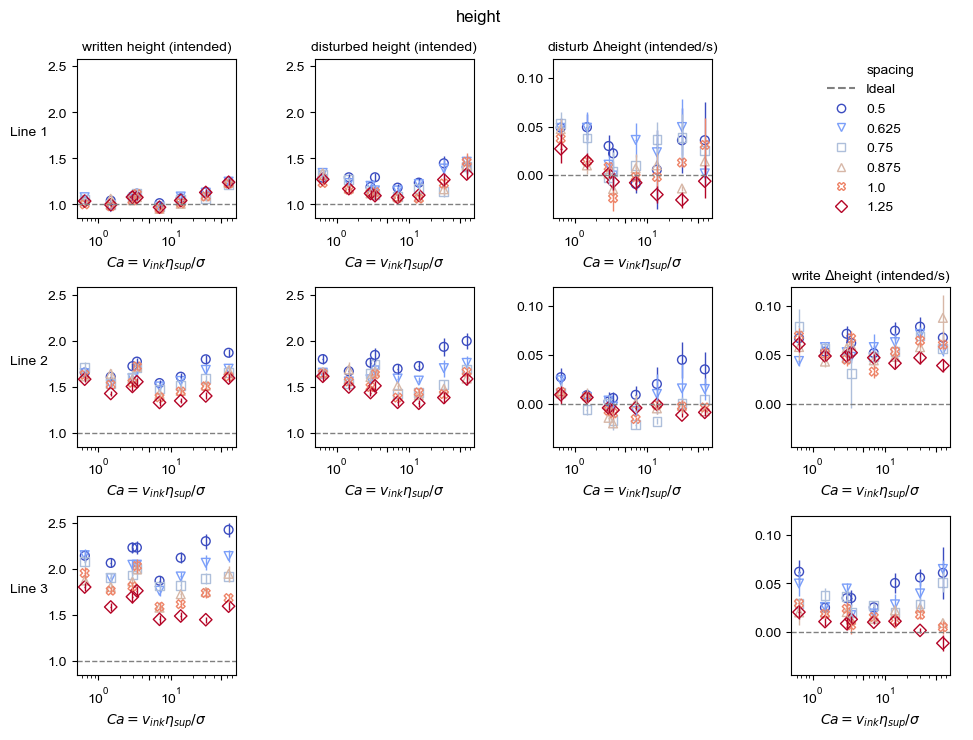

In [126]:
ssi = ms.ss
# ssi = ssi[~((ssi.ink_surfactantWt==0.05)&(ssi.ink_val==9))]
yvl = mp.yvarlines(ms, ssi, xvar='int_Ca', yvar='h', cvar='spacing', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.XSSDTIdeals('+y')
                   , logx=True, mode='scatter', dx=0.1)
yvl.fig

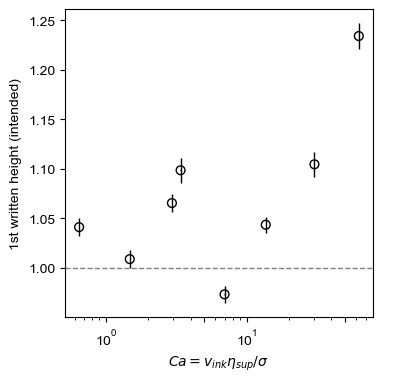

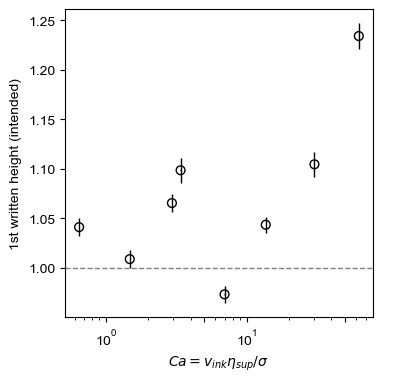

In [162]:
xvar = 'int_Ca'
yvar = 'h_w1o'
cvar = 'vRatio'
mvar = ''
p2 = mp.scatterPlot(ms, ms.ss, xvar=xvar, yvar=yvar, logx=True
                    , logy=False, dx=0.1, plotType='notebook', figsize=(4,4), cvar=cvar, mvar=mvar
                    , yideal=me.ideals().yideal(yvar), legendloc='right')
p2.fig

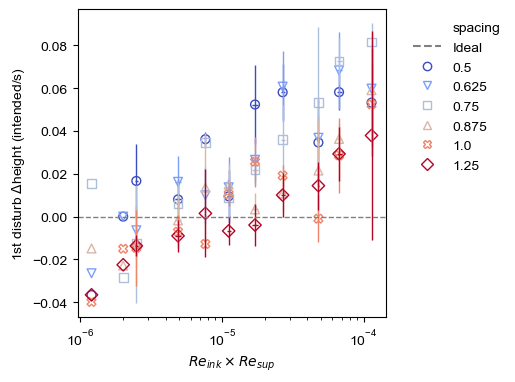

In [150]:
xvar = 'ReProd'
yvar = 'delta_h_disturb1'
cvar = 'spacing'
mvar = ''
p2 = mp.scatterPlot(ms, ms.ss, xvar=xvar, yvar=yvar, logx=True
                    , logy=False, dx=0.1, plotType='notebook', figsize=(4,4), cvar=cvar, mvar=mvar
                    , yideal=me.ideals().yideal(yvar), legendloc='right')
p2.fig

In [147]:
ms.reduceRows('delta_h_disturb1', yvarmax=-0.1);

,ink_shortname,sup_shortname,int_Ca,spacing,delta_h_disturb1
138,PDMSS10-S85-0.05,4.0,14.0,0.5,-0.18


In [148]:
ms.openFolder(138)

,variable,$r^2$,b,c,Spearman coeff,Spearman p
1,spacing_adj,0.05,-0.12,1.17,-0.20,4.0e-09


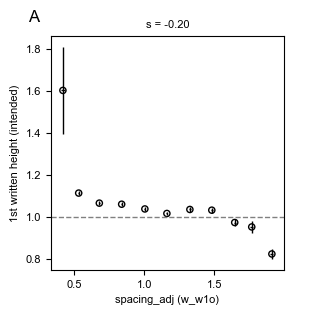

In [159]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'h_w1o',  logy=False, printOut=False
                            , package='pgfplot', trimVariables=True, getLinReg=True
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False
                            , exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,$r^2$,b,c,Spearman coeff,Spearman p
3,$We_{ink}/We_{sup}$,0.09,-1.56,-0.21,-0.26,4.9e-06


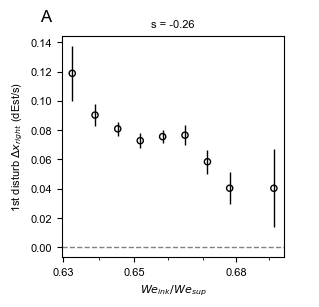

In [158]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_xRight_disturb1', logy=False, printOut=False
                            , package='pgfplot', trimVariables=True, getLinReg=True
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False
                            , exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,$r^2$,b,c,Spearman coeff,Spearman p
0,$Re_{ink}\times Re_{sup}$,0.27,0.04,0.21,0.51,2.2e-21
1,$\eta_{ink}\times \eta_{sup}$,0.27,-0.04,0.04,-0.51,2.5e-21


INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_h_disturb1RegImport.tex

---------------------------


INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_h_disturb1Reg.tex

---------------------------


INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\delta_h_disturb1Reg.png and .svg


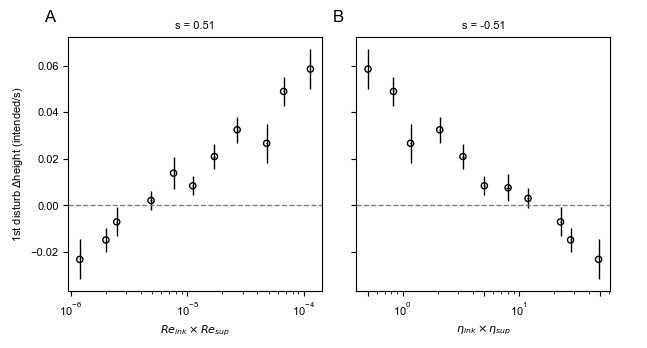

In [156]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_h_disturb1', logy=False, printOut=True
                            , package='pgfplot', trimVariables=True, getLinReg=True
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True
                            , exportFolder=os.path.join(cfg.path.fig, 'SDT'))

,variable,$r^2$,b,c,Spearman coeff,Spearman p
0,$Re_{ink}\times Re_{sup}$,0.24,0.04,0.23,0.52,1.1e-04
1,$\eta_{ink}\times \eta_{sup}$,0.24,-0.04,0.06,-0.52,1.3e-04


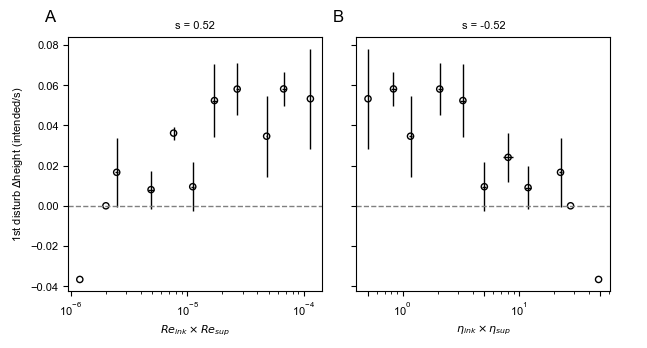

In [151]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_h_disturb1', spacing=0.5, logy=False, printOut=False
                            , package='pgfplot', trimVariables=True, getLinReg=True
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False
                            , exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [141]:
ms.reduceRows('delta_h_disturb1', ms.ss.int_Ca>50, ms.ss.spacing==1.250, yvarmin=-0.05);

,ink_shortname,sup_shortname,int_Ca,spacing,delta_h_disturb1
596,SO6-S20-0.5,4.0,62.72,1.25,-0.03
704,SO8-S20-0.5,4.0,62.72,1.25,-0.01
650,SO7-S20-0.5,4.0,62.72,1.25,0.03


In [139]:
ms.openFolder(650)

In [133]:
ms.u['delta_h_disturb1']

'intended/s'